In [30]:
import numpy as np
import pandas as pd

# 引入t检验相关函数(独立双样本检验）
from scipy.stats import ttest_ind

# 引入Z检验相关函数
from statsmodels.stats.weightstats import ztest

# 引入绘图相关库
import seaborn as sns
import matplotlib.pyplot as plt

## t检验

In [31]:
height_df = pd.read_csv("height.csv")
height_df

,身高,地区
0,165,A
1,167,A
2,172,A
3,176,A
4,178,A
5,180,A
6,182,A
7,183,A
8,185,A
9,188,A


In [32]:
region_a_height = height_df.query("地区 == 'A'")['身高']
region_b_height = height_df.query("地区 == 'B'")['身高']

In [33]:
region_a_height

0    165
1    167
2    172
3    176
4    178
5    180
6    182
7    183
8    185
9    188
Name: 身高, dtype: int64

In [34]:
region_b_height

10    155
11    158
12    160
13    162
14    165
15    168
16    172
17    176
18    179
19    182
Name: 身高, dtype: int64

In [35]:
# 替换图表的字体（你的系统上不一定有这个Heiti TC字体，如果没有的话需要替换成其它的）
matplotlib.rc("font",family='Heiti TC')

NameError: name 'matplotlib' is not defined

D:\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


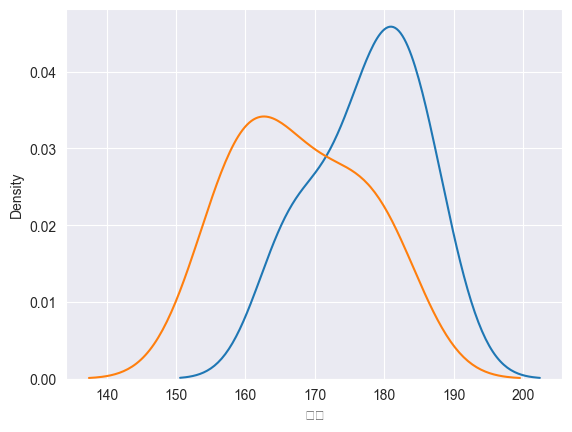

In [24]:
sns.kdeplot(region_a_height)
sns.kdeplot(region_b_height)
plt.show()

In [25]:
# 进行t检验
t_stat, p_value = ttest_ind(region_a_height, region_b_height)
print(t_stat, p_value)

2.608375959216796 0.017783305969556976


In [16]:
# 显著水平为0.05（显著水平一般用alpha字母表示）
alpha = 0.05

# 比较计算出的p值和显著水平
if p_value < alpha:
    print('两组数据有显著差异')
else:
    print('两组数据无显著差异')

两组数据有显著差异


## Z检验

In [36]:
height_df2 = pd.read_csv("height2.csv")
height_df2

,身高,地区
0,175,A
1,169,A
2,176,A
3,185,A
4,168,A
...,...,...
61,173,B
62,164,B
63,163,B
64,183,B


In [37]:
region_a_height2 = height_df2.query("地区 == 'A'")['身高']
region_b_height2 = height_df2.query("地区 == 'B'")['身高']

D:\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 36523 (\N{CJK UNIFIED IDEOGRAPH-8EAB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
D:\python\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


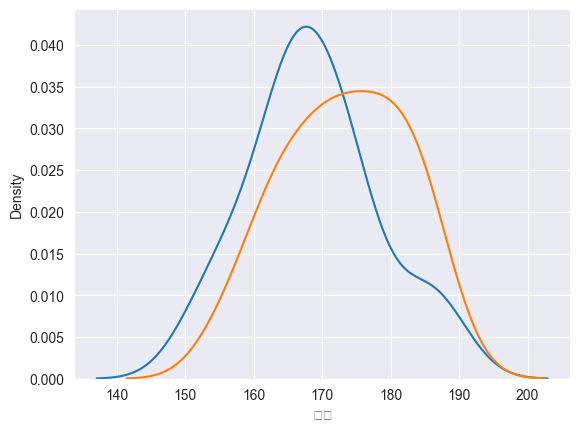

In [38]:
sns.kdeplot(region_a_height2)
sns.kdeplot(region_b_height2)
plt.show()

In [39]:
# 计算z值和p值（双尾）
z_stat, p_value = ztest(region_a_height2, region_b_height2, 
                        alternative='two-sided')
print(z_stat, p_value)

# 显著水平为0.05（显著水平一般用alpha字母表示）
alpha = 0.05

# 比较计算出的p值和显著水平
if p_value < alpha:
    print('两组数据有显著差异')
else:
    print('两组数据无显著差异')

-1.9906963757270788 0.04651427741343414
两组数据有显著差异


In [40]:
# 计算z值和p值（单尾正差异）
z_stat, p_value = ztest(region_a_height2, region_b_height2, 
                        alternative='larger')
print(z_stat, p_value)

# 显著水平为0.025（显著水平一般用alpha字母表示）
alpha = 0.025

# 比较计算出的p值和显著水平
if p_value < alpha:
    print('两组数据有显著差异')
else:
    print('两组数据无显著差异')

-1.9906963757270788 0.9767428612932829
两组数据无显著差异


In [15]:
# 计算z值和p值（单尾负差异）
z_stat, p_value = ztest(region_a_height2, region_b_height2, 
                        alternative='smaller')
print(z_stat, p_value)

# 显著水平为0.025（显著水平一般用alpha字母表示）
alpha = 0.025

# 比较计算出的p值和显著水平
if p_value < alpha:
    print('两组数据有显著差异')
else:
    print('两组数据无显著差异')

-1.9906963757270788 0.02325713870671707
两组数据有显著差异
